In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px


# Q1

In [27]:
file_path_cars = r'C:\Users\qaism\OneDrive - University of Virginia\Documents\Class Documents\DS 3001\assignment4\data\cars_hw.csv'
cars_data = pd.read_csv(file_path_cars)

In [28]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cars_cleaned = remove_outliers(cars_data, 'Price')
cars_cleaned = remove_outliers(cars_cleaned, 'Mileage_Run')

# Q2

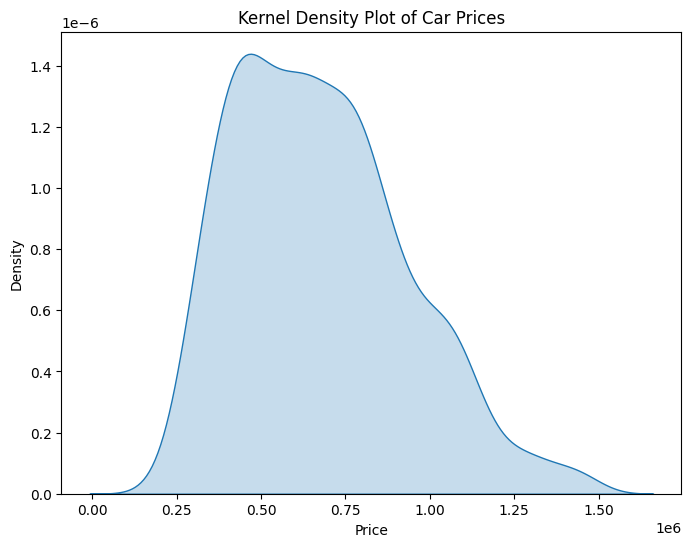

In [29]:
price_summary = cars_cleaned['Price'].describe()

plt.figure(figsize=(8, 6))
sns.kdeplot(cars_cleaned['Price'], fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [30]:
price_by_make = cars_cleaned.groupby('Make')['Price'].describe()
print(price_by_make[['mean', '50%', 'min', 'max']])


                       mean        50%        min        max
Make                                                        
Chevrolet      4.535000e+05   345500.0   267000.0   892000.0
Datsun         2.896667e+05   290000.0   279000.0   300000.0
Ford           7.211731e+05   707500.0   290000.0  1066000.0
Honda          7.887222e+05   778500.0   316000.0  1411000.0
Hyundai        6.884375e+05   638000.0   248000.0  1464000.0
Jeep           1.290000e+06  1290000.0  1290000.0  1290000.0
Kia            1.369000e+06  1369000.0  1369000.0  1369000.0
Mahindra       1.100167e+06  1094500.0   796000.0  1465000.0
Maruti Suzuki  5.887850e+05   527000.0   237000.0  1163000.0
Nissan         8.842500e+05   978000.0   475000.0  1106000.0
Renault        6.625735e+05   644000.0   287000.0  1164000.0
Skoda          6.847500e+05   502000.0   436000.0  1299000.0
Tata           7.662941e+05   829000.0   188000.0  1419000.0
Toyota         8.003400e+05   894000.0   368000.0  1092000.0
Volkswagen     6.058276e

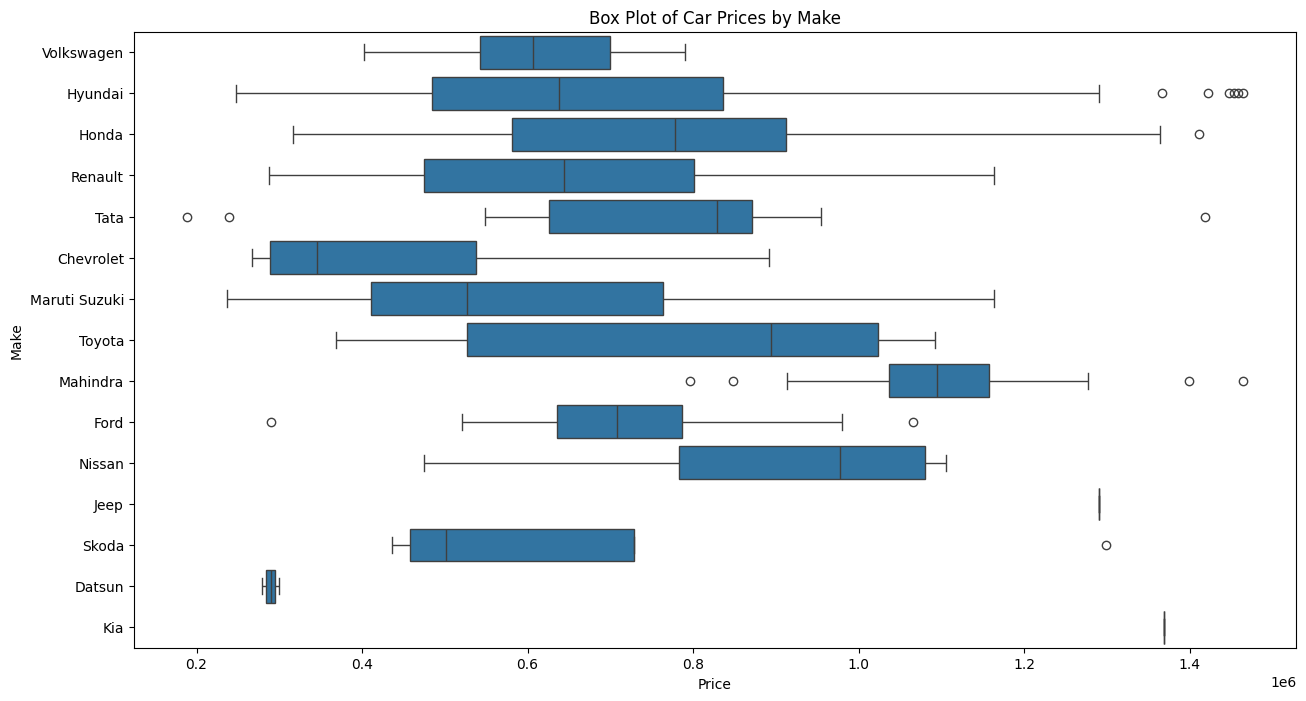

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=cars_cleaned, x='Price', y='Make')
plt.title('Box Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Make')
plt.show()

C:\Users\qaism\AppData\Local\Temp\ipykernel_61488\1310861867.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cars_cleaned, x='Price', hue='Make', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


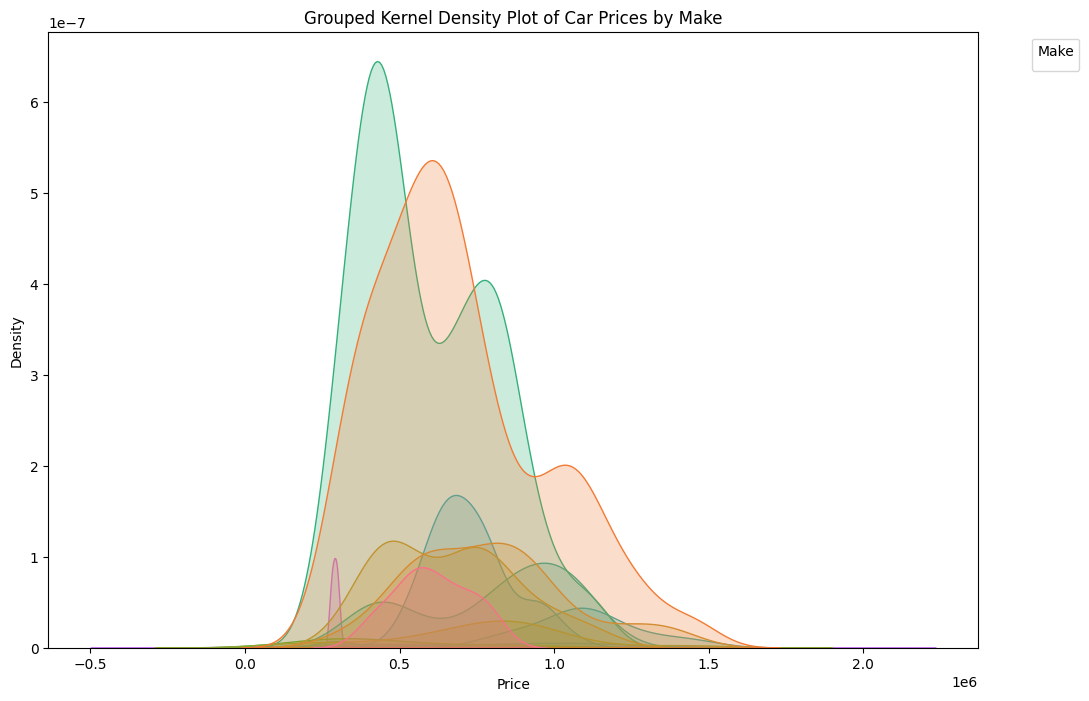

In [32]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=cars_cleaned, x='Price', hue='Make', fill=True)
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#2: Kia appears to be the most expensive on average, with a mean price of 1,369,000. Jeep follows with a single model at 1,290,000. Mahindra also shows a high average price, around 1,100,167.

The box plot reveals a wide variation in prices among different car makes, with some brands like Tata, Mahindra, and Toyota showing a broader range of prices, as indicated by the length of their boxes and whiskers.
The kernel density plot shows that most car prices are clustered in the lower to middle price range, with a few brands stretching towards higher values.

# Q3

In [33]:
train_set, test_set = train_test_split(cars_cleaned, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_set)}")
print(f"Testing set size: {len(test_set)}")

Training set size: 737
Testing set size: 185


# Q4

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [35]:
numeric_columns = cars_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Price')

# Splitting the data
X_numeric = cars_cleaned[numeric_columns]
y = cars_cleaned['Price']
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)  

model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)

# Predictions and evaluation for numeric model
y_pred_num = model_numeric.predict(X_test_num)
r2_score_num = model_numeric.score(X_test_num, y_test)
rmse_num = mean_squared_error(y_test, y_pred_num, squared=False)

print(f"Numeric Model - R^2: {r2_score_num:.4f}, RMSE: {rmse_num:.2f}")

Numeric Model - R^2: 0.2906, RMSE: 225072.31


In [36]:
categorical_columns = cars_cleaned.select_dtypes(include=['object']).columns

# One-hot encoding categorical variables
encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(cars_cleaned[categorical_columns])

# Splitting the data
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

# Model with categorical variables
model_categorical = LinearRegression()
model_categorical.fit(X_train_cat, y_train)

# Predictions and evaluation for categorical model
y_pred_cat = model_categorical.predict(X_test_cat)
r2_score_cat = model_categorical.score(X_test_cat, y_test)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)

print(f"Categorical Model - R^2: {r2_score_cat:.4f}, RMSE: {rmse_cat:.2f}")

Categorical Model - R^2: -198947637665434272006144.0000, RMSE: 119190074651052624.00


c:\Python311-32\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
X_combined = np.hstack((X_numeric, X_categorical))

# Splitting the data
X_train_comb, X_test_comb, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Model with combined variables
model_combined = LinearRegression()
model_combined.fit(X_train_comb, y_train)

# Predictions and evaluation for combined model
y_pred_comb = model_combined.predict(X_test_comb)
r2_score_comb = model_combined.score(X_test_comb, y_test)
rmse_comb = mean_squared_error(y_test, y_pred_comb, squared=False)

print(f"Combined Model - R^2: {r2_score_comb:.4f}, RMSE: {rmse_comb:.2f}")

Combined Model - R^2: 0.7497, RMSE: 133700.65


- **Numeric Model**: Achieved an \(R^2\) of 0.2906 and an RMSE of 225,072.31, reflecting limited predictive power using only numeric variables.
- **Categorical Model**: Performed very poorly, with a substantially negative \(R^2\) and an extremely high RMSE, indicating significant issues with model fit or data encoding.
- **Combined Model**: Significantly outperformed the numeric-only model with an \(R^2\) of 0.7497 and an RMSE of 133,700.65, suggesting that a mix of numeric and categorical variables greatly enhances model performance.

The combined model, incorporating both numeric and one-hot encoded categorical variables, emerged as the better choice, underscoring the value of including a broader range of information for predicting prices.


# Q5 

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
best_r2 = -float('inf')
best_rmse = float('inf')
best_degree = 0

In [40]:
for degree in range(1, 6):  # adjust range
    # polynomial regression model
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_comb)
    X_test_poly = poly.transform(X_test_comb)

    # Fit the model
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)


    y_pred_poly = model_poly.predict(X_test_poly)
    r2_score_poly = model_poly.score(X_test_poly, y_test)
    rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)

    # Check if this is the best model
    if r2_score_poly > best_r2:
        best_r2 = r2_score_poly
        best_rmse = rmse_poly
        best_degree = degree

    print(f"Degree {degree} - R^2: {r2_score_poly:.4f}, RMSE: {rmse_poly:.2f}")

    # Check if R^2 goes negative
    if r2_score_poly < 0:
        print(f"R^2 goes negative at degree {degree}")
        break  # Stop if R^2 is negative

# Output the best model's results
print(f"Best Model - Degree {best_degree} - R^2: {best_r2:.4f}, RMSE: {best_rmse:.2f}")

Degree 1 - R^2: 0.7497, RMSE: 133700.65
Degree 2 - R^2: -17113117.6004, RMSE: 1105440262.73
R^2 goes negative at degree 2
Best Model - Degree 1 - R^2: 0.7497, RMSE: 133700.65


**Degree 1**: The baseline linear model without polynomial features produced an \(R^2\) of 0.7497 and an RMSE of 133,700.65.
- **Degree 2**: The model with polynomial features of degree 2 showed overfitting, with \(R^2\) becoming highly negative at -17,113,117.6004 and RMSE escalating to 1,105,440,262.73.
- **Best Model**: The best performance was achieved without polynomial expansion (degree 1), as the addition of polynomial features worsened the model's predictive capability.

Thus, the model without polynomial features (Degree 1) remains the preferred model, as higher-degree polynomial features resulted in negative \(R^2\) values and higher RMSE, indicating overfitting.

# Q6

In [41]:
from sklearn.metrics import mean_squared_error


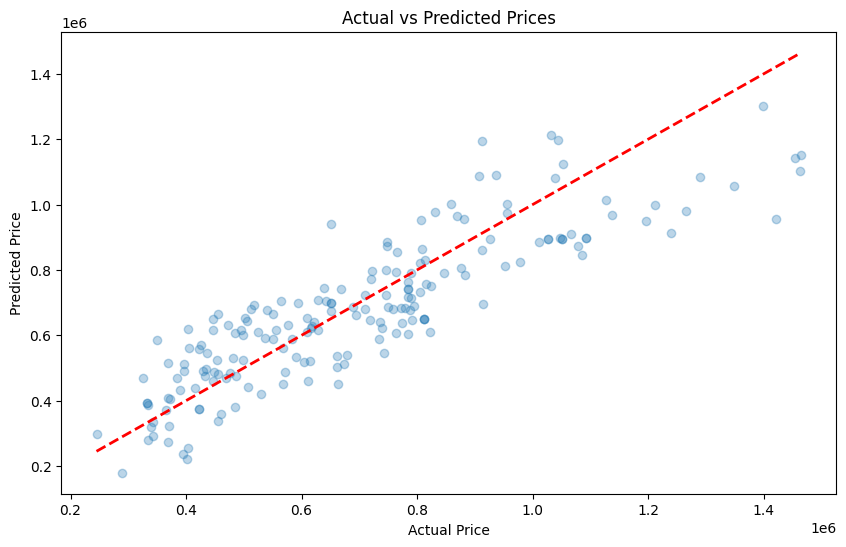

In [42]:
y_pred = model_combined.predict(X_test_comb)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


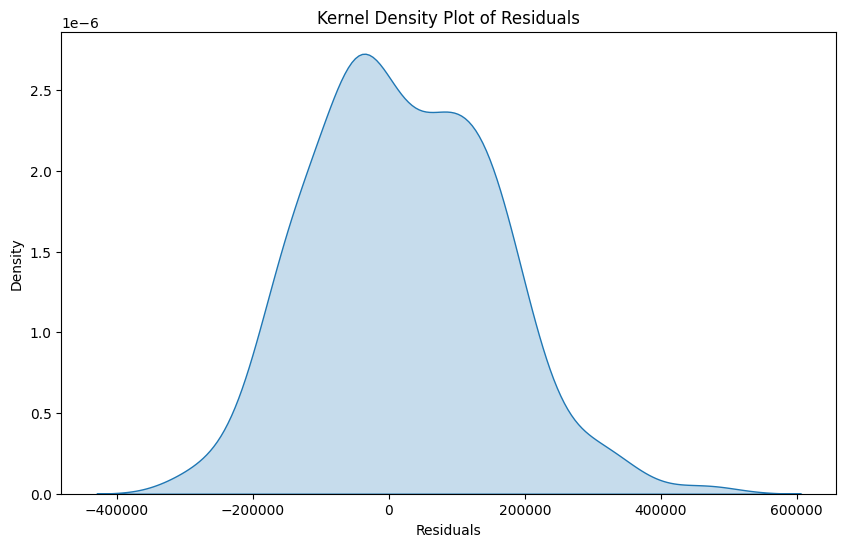

In [43]:
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals')
plt.show()

In [44]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 133700.65


- **Residuals Analysis**: The residuals show a right skew, indicating the model often underpredicts the price.
- **Actual vs. Predicted**: The scatter plot shows alignment near the diagonal for many predictions, but with dispersion at higher prices, suggesting less accuracy for expensive cars.
- **RMSE**: A value of 133,700.65 points to a significant average error, but it's an improvement over simpler models.

**Model Strengths**:
- Accounts for a substantial portion of variance in prices.
- Uses both numeric and categorical data for predictions.

**Model Weaknesses**:
- Residuals and RMSE suggest inaccuracies, especially for high-value cars.


# Q7


In [45]:
from sklearn.tree import DecisionTreeRegressor

best_r2 = -float('inf')
best_rmse = float('inf')
best_depth = 0

In [46]:
for depth in range(1, 11): 
    # Create and fit the decision tree regressor
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_comb, y_train)

    # Predict on the test set
    y_pred_tree = tree_reg.predict(X_test_comb)

    # Calculate R^2 and RMSE for the test set
    r2_tree = tree_reg.score(X_test_comb, y_test)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

    # Check if this depth gives a better score
    if r2_tree > best_r2:
        best_r2 = r2_tree
        best_rmse = rmse_tree
        best_depth = depth

    # Print the scores for each depth
    print(f"Depth {depth} - R^2: {r2_tree:.4f}, RMSE: {rmse_tree:.2f}")

# Print the best depth and corresponding scores
print(f"Best Depth: {best_depth} - R^2: {best_r2:.4f}, RMSE: {best_rmse:.2f}")

Depth 1 - R^2: 0.2890, RMSE: 225316.42
Depth 2 - R^2: 0.4802, RMSE: 192658.68
Depth 3 - R^2: 0.5841, RMSE: 172339.41
Depth 4 - R^2: 0.6479, RMSE: 158571.47
Depth 5 - R^2: 0.6887, RMSE: 149092.35
Depth 6 - R^2: 0.7034, RMSE: 145532.91
Depth 7 - R^2: 0.7677, RMSE: 128801.29
Depth 8 - R^2: 0.7898, RMSE: 122500.40
Depth 9 - R^2: 0.7972, RMSE: 120345.72
Depth 10 - R^2: 0.7847, RMSE: 123979.72
Best Depth: 9 - R^2: 0.7972, RMSE: 120345.72


The decision tree regressor's performance peaked at a depth of 9, achieving an \(R^2\) of 0.7972 and an RMSE of 120,345.72. This suggests that depth 9 provides the best trade-off between model complexity and generalization. Increasing the depth beyond this point showed signs of overfitting, since we see a slight drop in performance at depth 10.


# Q8

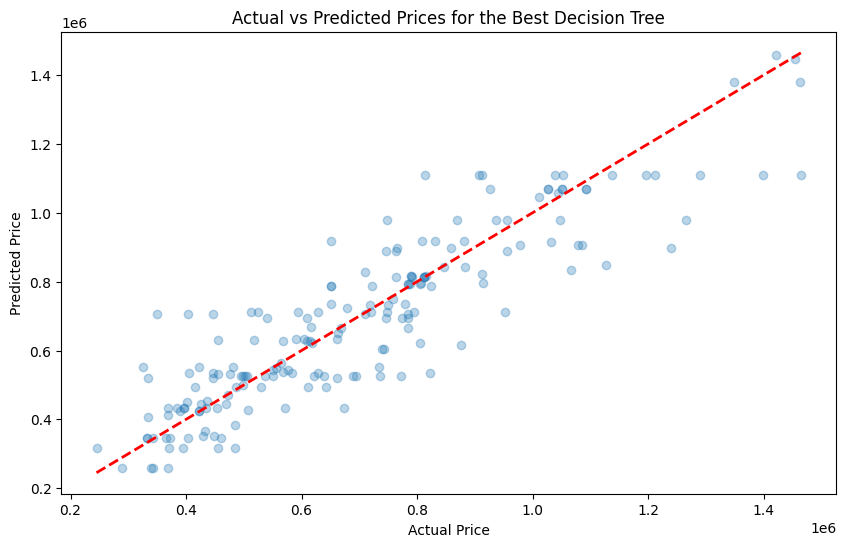

In [47]:
best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_tree_model.fit(X_train_comb, y_train)
y_pred_best_tree = best_tree_model.predict(X_test_comb)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_tree, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices for the Best Decision Tree')
plt.show()

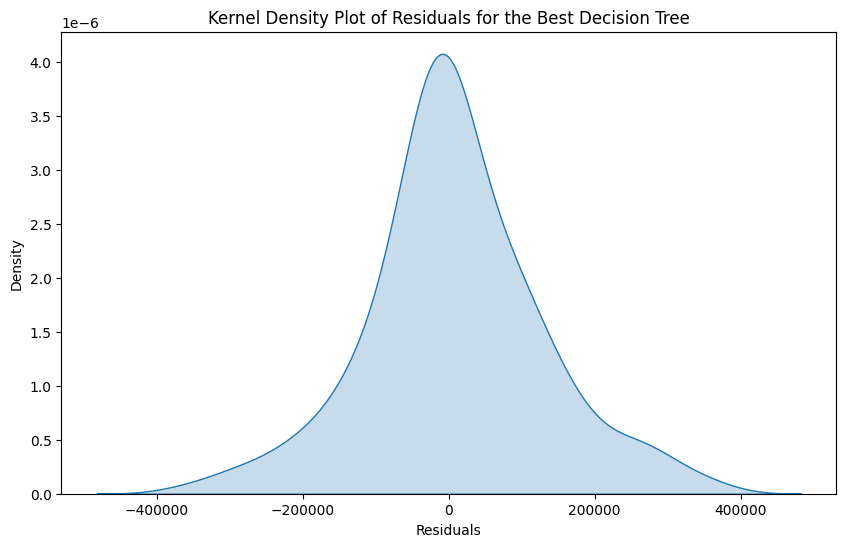

In [48]:
residuals_best_tree = y_test - y_pred_best_tree
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals_best_tree, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals for the Best Decision Tree')
plt.show()

- The **Kernel Density Plot** of residuals indicates a distribution that is not centered around zero and has a right skew, suggesting an underestimation for a number of predictions.

- The **Actual vs. Predicted Prices** scatter plot shows a reasonable correlation along the diagonal, but with noticeable variance, especially at higher price points. This suggests that while the model can capture the general trend, its precision decreases with higher-valued cars.

These visual assessments suggest that the decision tree model captures the overall trend in the data but may struggle with consistency across the entire price range.


# Q12

Comparing the two models on the test set:

- The **decision tree model** outperforms the linear model with a higher \(R^2\) of 0.7972 compared to 0.7497 for the linear model, indicating it explains more variance.
- It also has a lower RMSE of 120,345.72 versus 133,700.65 for the linear model, suggesting more accurate predictions.

Therefore, the decision tree model has better performance on the test set.
